#  Actividad | Selección y limpieza de los Datos en Python

### Integrantes

Alumno: **Erick de Jesus Hernández Cerecedo**  
Matricula: **A01066428**

Alumno: **Francisco Javier Hernández Camarillo**  
Matricula: **A00998083**

### Información del Curso

Nombre: **Ciencia y analítica de datos**  
Profesor: **Jobish Vallikavungal Devassia**

Fechas: **Martes 11 de octubre de 2022**

---

### Parte 1: Ejercicio guiado

**Paso 1:** Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

In [15]:
# Principal components analysis (PCA)

# Importar la librerias necesarias para la actividad
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

# URL de la base de datos
path = "clean-credit-card-clients.csv"

# Lectura de los datos obtenios CSV
data = pd.read_csv(path, names=['X1', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X12', 'X13', 'X14', 'X18', 'X19', 'X20', 'Y'], header=0 )
data.head(5)

,,X1,X3,X4,X5,X6,X7,X8,X12,X13,X14,X18,X19,X20,Y
0,1,20000,2.0,1.0,24.0,2.0,2.0,-1.0,3913.0,3102.0,689.0,0.0,689.0,0.0,1.0
1,2,120000,2.0,2.0,26.0,-1.0,2.0,0.0,2682.0,1725.0,2682.0,0.0,1000.0,1000.0,1.0
2,3,90000,2.0,2.0,34.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,1518.0,1500.0,1000.0,0.0
3,4,50000,2.0,1.0,37.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,2000.0,2019.0,1200.0,0.0
4,5,50000,2.0,1.0,57.0,-1.0,0.0,-1.0,8617.0,5670.0,35835.0,2000.0,36681.0,10000.0,0.0


In [20]:
data.corr()

,X1,X3,X4,X5,X6,X7,X8,X12,X13,X14,X18,X19,X20,Y
X1,1.000000,-0.219120,-0.107801,0.144515,-0.271201,-0.296206,-0.286245,0.285616,0.278435,0.283373,0.195026,0.178320,0.210052,-0.153781
X3,-0.219120,1.000000,-0.143431,0.175079,0.105636,0.121632,0.114012,0.023451,0.018669,0.012913,-0.037385,-0.030007,-0.039953,0.028109
X4,-0.107801,-0.143431,1.000000,-0.413926,0.019747,0.024052,0.032430,-0.023430,-0.021536,-0.024876,-0.005705,-0.008016,-0.003399,-0.024544
X5,0.144515,0.175079,-0.413926,1.000000,-0.039432,-0.050154,-0.053249,0.056357,0.054469,0.053911,0.025995,0.021820,0.029262,0.013881
X6,-0.271201,0.105636,0.019747,-0.039432,1.000000,0.672290,0.574706,0.187115,0.189906,0.179796,-0.079230,-0.070083,-0.070460,0.324769
X7,-0.296206,0.121632,0.024052,-0.050154,0.672290,1.000000,0.766857,0.234878,0.235227,0.224105,-0.080771,-0.058981,-0.055864,0.263761
X8,-0.286245,0.114012,0.032430,-0.053249,0.574706,0.766857,1.000000,0.208843,0.237642,0.227827,0.001210,-0.066784,-0.053294,0.235765
X12,0.285616,0.023451,-0.023430,0.056357,0.187115,0.234878,0.208843,1.000000,0.951494,0.892272,0.140276,0.099301,0.156856,-0.019686
X13,0.278435,0.018669,-0.021536,0.054469,0.189906,0.235227,0.237642,0.951494,1.000000,0.928306,0.280323,0.100770,0.150631,-0.014240
X14,0.283373,0.012913,-0.024876,0.053911,0.179796,0.224105,0.227827,0.892272,0.928306,1.000000,0.244291,0.316904,0.129933,-0.014141


In [22]:
ndata = data[['X12', 'X13']]
ndata.corr()

,X12,X13
X12,1.000000,0.951494
X13,0.951494,1.000000


In [30]:
data.X12.mean().round(2)

51248.12

In [31]:
data.X13.mean().round(2)

49200.49

In [34]:
Varience = np.cov([data.X12, data.X13])
Varience

array([[5.42799825e+09, 4.99199975e+09],
       [4.99199975e+09, 5.07103967e+09]])

In [36]:
ndata = data[['X12', 'X13']]
ndata.var().sum()

10499037918.035707

In [39]:
t = ndata.var().sum()
varC =Varience[0][0]
varR = Varience[1][1]

print('Total Varience \t\t\t:', t.round(2) )
print('Varience prop. of X12 \t:', ((varC/t)*100).round(2),'%' )
print('Varience prop. of X13 \t:', ((varR/t)*100).round(2),'%' )

Total Varience 			: 10499037918.04
Varience prop. of X12 	: 51.7 %
Varience prop. of X13 	: 48.3 %


In [40]:
ndata.corr().round(2)

,X12,X13
X12,1.00,0.95
X13,0.95,1.00


**Paso 2:** Interprete cada componente principal en términos de las variables originales

<AxesSubplot: xlabel='X12', ylabel='X13'>

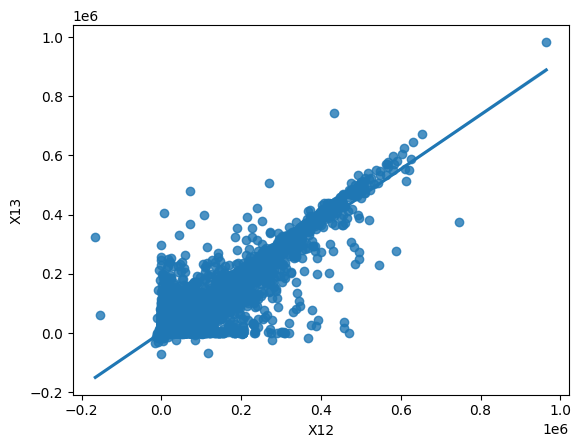

In [42]:
import seaborn as sns

p = sns.regplot(data = data,  
                x = data.X12, 
                y = data.X13
               ) 
p

In [43]:
import numpy as np
from sklearn.decomposition import PCA

pcs = PCA(n_components=2)

pcs.fit(data[['X12', 'X13']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,101216.146329,0.975776,0.975776
1,15947.715835,0.024224,1.000000


In [44]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1
Standard deviation,101216.15,15947.72
Proportion of variance,0.98,0.02
Cumulative proportion,0.98,1.00


In [45]:
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2
Standard deviation,101216.1463,15947.7158
Proportion of variance,0.9758,0.0242
Cumulative proportion,0.9758,1.0000


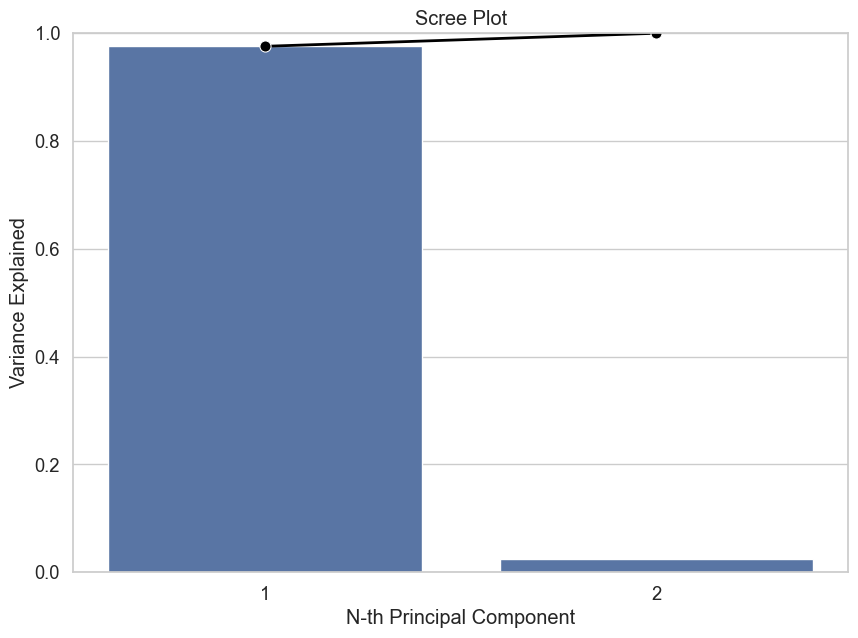

In [46]:
# Scree Plot
import matplotlib as mpl
import matplotlib.pyplot as plt

PC_components = np.arange(pcs.n_components_) + 1

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
_.set(xlabel='N-th Principal Component', ylabel = 'Variance Explained')
plt.ylim(0, 1)
plt.show()

In [47]:
pcs.components_.round(4)

array([[ 0.7196,  0.6944],
       [-0.6944,  0.7196]])

In [48]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2'],
                                index=['X12', 'X13']
                                )
pcsComponents_df

,PC1,PC2
X12,0.719628,-0.694359
X13,0.694359,0.719628


In [49]:
scores = pd.DataFrame(pcs.transform(data[['X12', 'X13']]),
                      columns=['x', 'y']
                      )
scores.head()

,x,y
0,-66072.618739,-306.205784
1,-67914.614171,-442.377833
2,-40261.432704,-10029.609328
3,-3736.052625,2260.429202
4,-60904.371707,-1724.466203


**Paso 3:** Identifique valores atípicos

### Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

¿Cuál es el número de componentes mínimo y por qué?



¿Cuál es la variación de los datos que representan esos componentes?

¿Cuál es la pérdida de información después de realizar PCA?

De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?